In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


---
># **Convert .csv to .parquet for faster processing (DO NOT RUN AGAIN)**
---

In [ ]:
# Define column names
column_names = [
    "class_label", "lepton1_pT", "lepton1_eta", "lepton1_phi",
    "lepton2_pT", "lepton2_eta", "lepton2_phi",
    "missing_energy_magnitude", "missing_energy_phi",
    "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]

# Path to CSV file in Google Drive
file_path = '/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/SUSY.csv'

# Load data efficiently with dtype and column names

# Convert to Parquet (only run once)
SUSY = pd.read_csv(file_path, header=None, names=column_names, engine="pyarrow")
SUSY.to_parquet("/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/SUSY.parquet")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/SUSY.csv'

---

In [3]:
# Path to the Parquet file
parquet_path = '/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/SUSY.parquet'

# Load Parquet file
SUSY = pd.read_parquet(parquet_path, engine="pyarrow")

SUSY.shape

(5000000, 19)

In [4]:
SUSY.head()

,class_label,lepton1_pT,lepton1_eta,lepton1_phi,lepton2_pT,lepton2_eta,lepton2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [5]:
SUSY.describe()

,class_label,lepton1_pT,lepton1_eta,lepton1_phi,lepton2_pT,lepton2_eta,lepton2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,4.575654e-01,1.000318e+00,2.192580e-05,-4.994657e-05,9.994304e-01,-3.713140e-05,-1.972243e-05,9.999744e-01,3.542352e-05,1.001437e+00,-4.878472e-05,1.000360e+00,9.999559e-01,9.999164e-01,1.000422e+00,1.000112e+00,1.000192e+00,9.994852e-01,2.249139e-01
std,4.981961e-01,6.873341e-01,1.003107e+00,1.001670e+00,6.542200e-01,1.002839e+00,1.001631e+00,8.728877e-01,1.001654e+00,8.901668e-01,1.001594e+00,6.288446e-01,5.841139e-01,4.708406e-01,8.592491e-01,6.207165e-01,6.237672e-01,4.360948e-01,1.969804e-01
min,0.000000e+00,2.548815e-01,-2.102927e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,2.598711e-04,-1.727117e+00,7.693475e-08,-1.671863e+01,2.673070e-01,1.041228e-03,2.048078e-03,0.000000e+00,2.734135e-02,4.452858e-03,3.211849e-07,4.172130e-08
25%,0.000000e+00,5.624837e-01,-7.573512e-01,-8.673567e-01,5.969881e-01,-7.695916e-01,-8.683741e-01,4.784546e-01,-8.661510e-01,3.691849e-01,-4.923983e-01,5.883287e-01,6.223411e-01,6.505438e-01,1.705215e-01,5.985209e-01,5.134394e-01,6.879128e-01,6.908188e-02
50%,0.000000e+00,7.915511e-01,1.342127e-04,-3.880155e-04,7.997993e-01,-3.793710e-04,2.006134e-04,7.738360e-01,-9.172642e-03,8.019273e-01,-8.037898e-02,8.286114e-01,8.781311e-01,9.344703e-01,9.018388e-01,8.355336e-01,9.142514e-01,1.094396e+00,1.672500e-01
75%,1.000000e+00,1.204413e+00,7.576486e-01,8.670981e-01,1.162353e+00,7.692296e-01,8.674778e-01,1.207444e+00,8.687620e-01,1.375392e+00,3.489009e-01,1.211083e+00,1.220313e+00,1.283522e+00,1.613231e+00,1.207994e+00,1.384583e+00,1.369183e+00,3.303652e-01
max,1.000000e+00,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.338644e+01,2.048790e+01,2.107572e+01,1.616682e+01,6.731210e+00,2.068624e+01,2.115226e+01,1.561370e+01,1.591660e+00,1.000000e+00


In [ ]:
SUSY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   class_label               float64
 1   lepton1_pT                float64
 2   lepton1_eta               float64
 3   lepton1_phi               float64
 4   lepton2_pT                float64
 5   lepton2_eta               float64
 6   lepton2_phi               float64
 7   missing_energy_magnitude  float64
 8   missing_energy_phi        float64
 9   MET_rel                   float64
 10  axial_MET                 float64
 11  M_R                       float64
 12  M_TR_2                    float64
 13  R                         float64
 14  MT2                       float64
 15  S_R                       float64
 16  M_Delta_R                 float64
 17  dPhi_r_b                  float64
 18  cos_theta_r1              float64
dtypes: float64(19)
memory usage: 724.8 MB


In [ ]:
# Checking NULL values
SUSY.isnull().sum()

,0
class_label,0
lepton1_pT,0
lepton1_eta,0
lepton1_phi,0
lepton2_pT,0
lepton2_eta,0
lepton2_phi,0
missing_energy_magnitude,0
missing_energy_phi,0
MET_rel,0


In [ ]:
# Checking duplicate values
SUSY.nunique()

,0
class_label,2
lepton1_pT,967230
lepton1_eta,1908900
lepton1_phi,1569800
lepton2_pT,814756
lepton2_eta,1881909
lepton2_phi,1568605
missing_energy_magnitude,1235044
missing_energy_phi,1567288
MET_rel,1512098


Class Counts:
 class_label
0.0    2712173
1.0    2287827
Name: count, dtype: int64

Difference between class counts: 424346


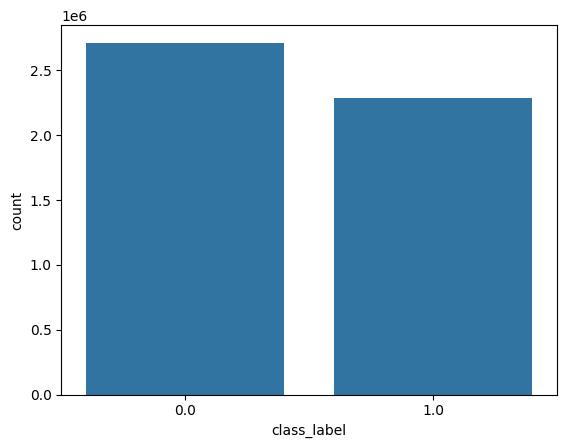

In [ ]:
# Count occurrences of each class
class_counts = SUSY["class_label"].value_counts()
print("Class Counts:\n", class_counts)

# Calculate the difference
class_difference = abs(class_counts.iloc[0] - class_counts.iloc[1])
print("\nDifference between class counts:", class_difference)

# Plot the class distribution
sns.countplot(x="class_label", data=SUSY)
plt.show()


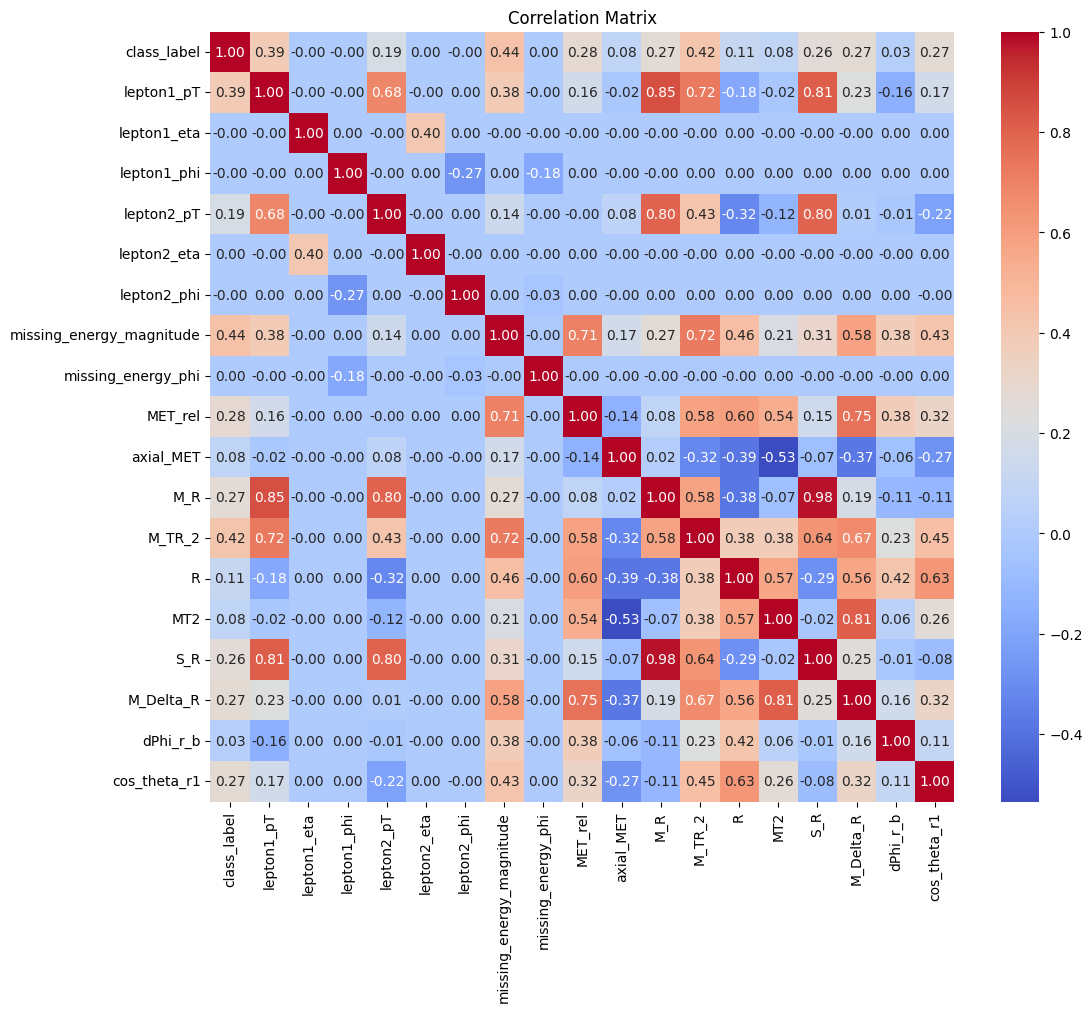

In [ ]:
# Correlation between features
correlation_matrix = SUSY.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

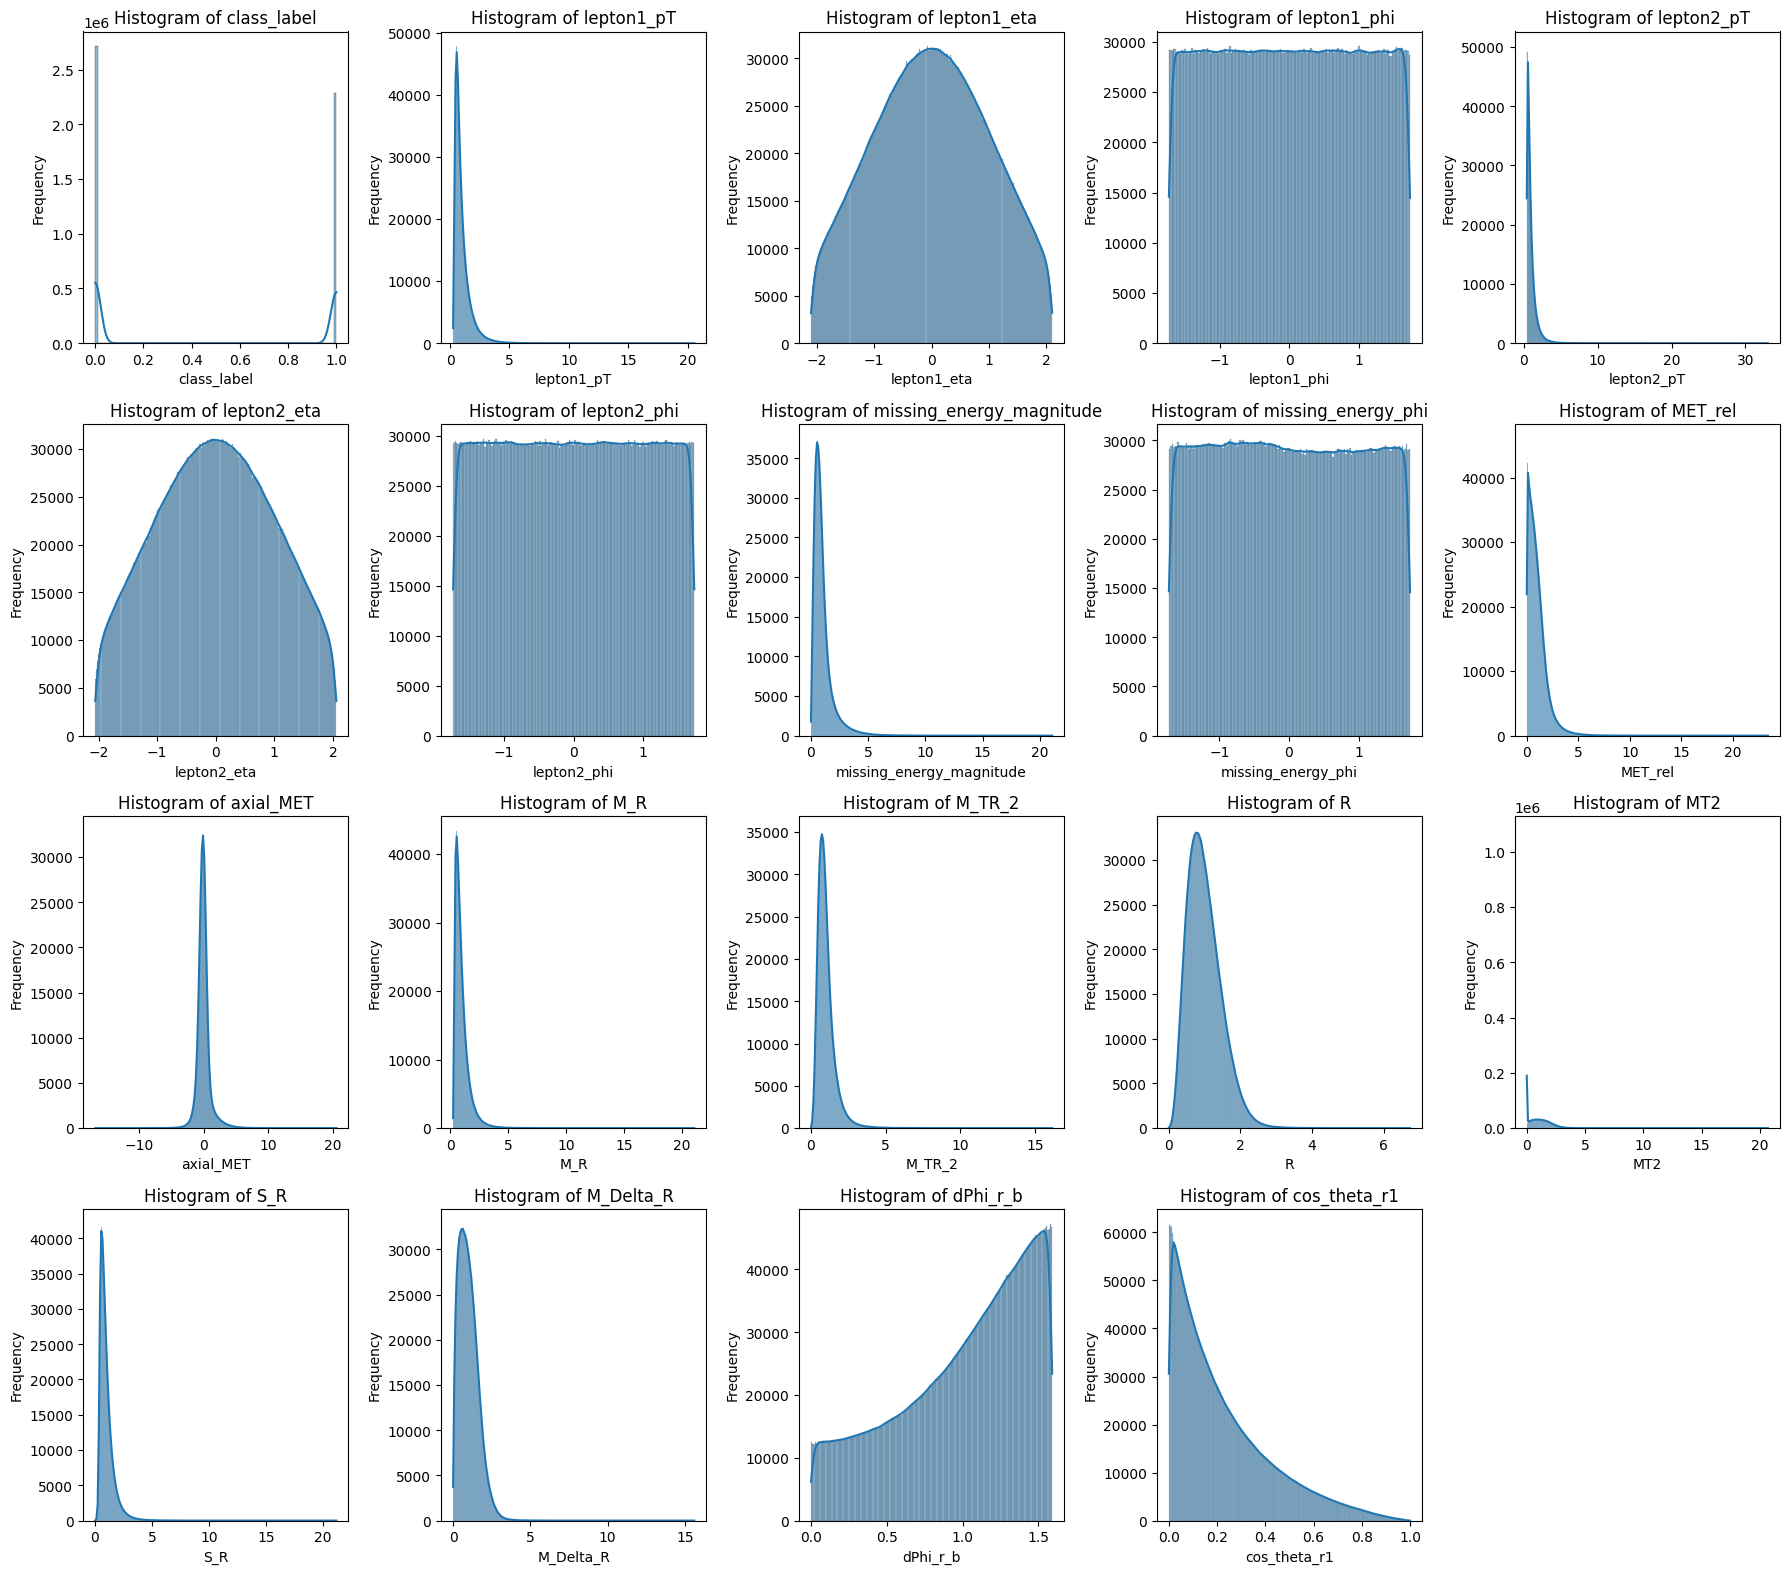

In [8]:
# num_cols = len(SUSY.columns)
# cols_per_row = 4
# rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
# axes = axes.flatten()  # Flatten to 1D array for easy indexing

# for i, column in enumerate(SUSY.columns):
#     sns.histplot(SUSY[column], kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# # Remove unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

num_cols = len(SUSY.columns)
cols_per_row = 5  # Set 5 plots per row
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot histograms
for i, column in enumerate(SUSY.columns):
    sns.histplot(SUSY[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


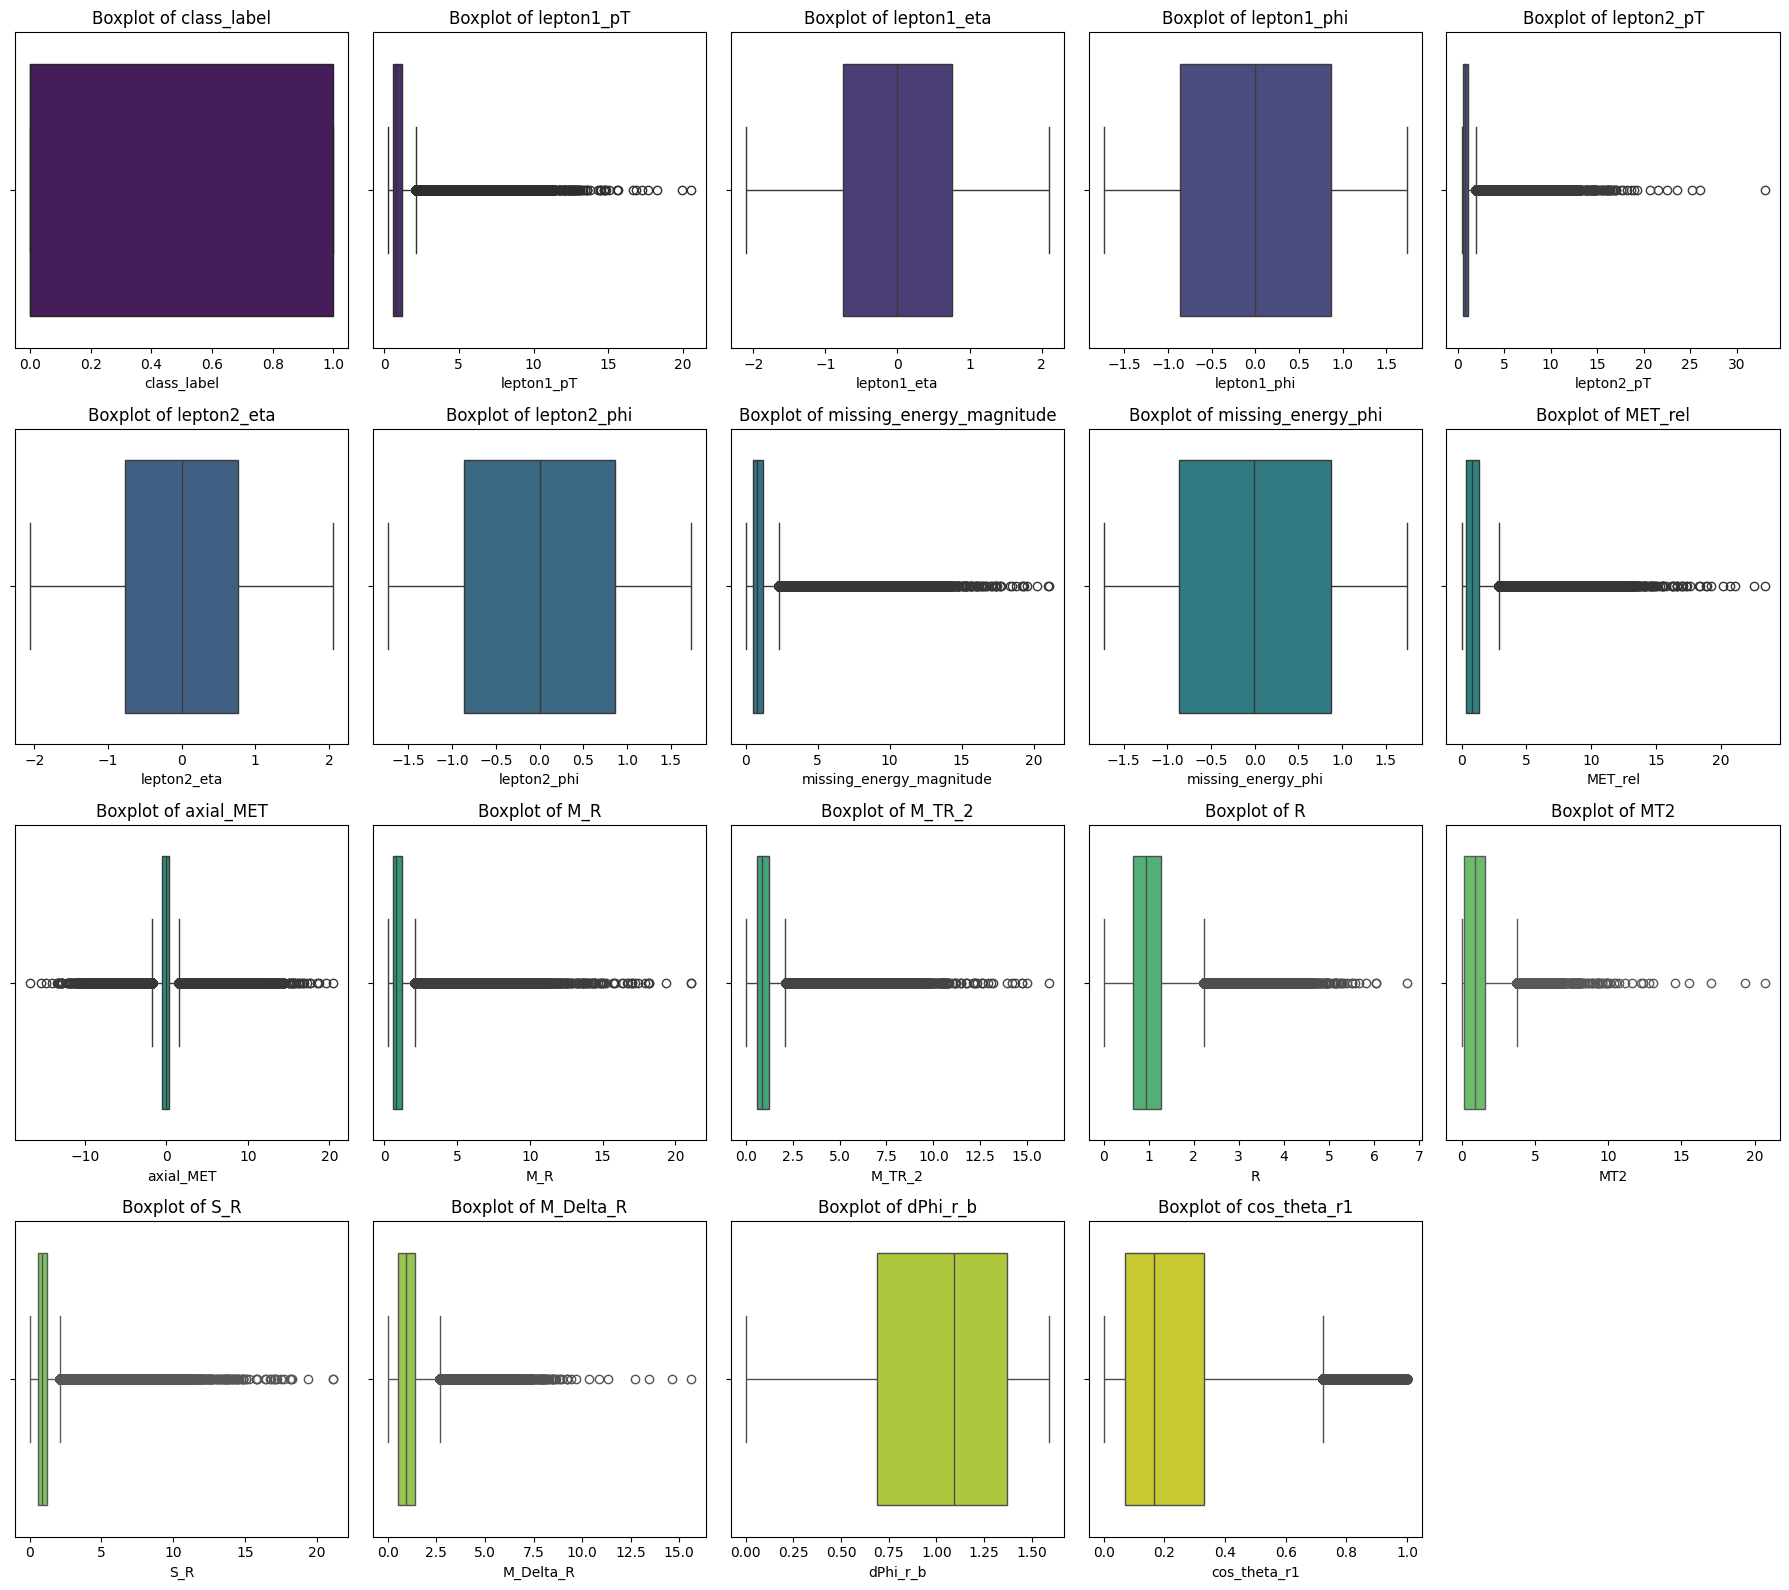

In [9]:
# cols_per_row = 4
# num_cols = len(SUSY.columns)
# rows = int(np.ceil(num_cols / cols_per_row))

# fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
# axes = axes.flatten()

# # Choose a color palette
# palette = sns.color_palette("viridis", num_cols)

# for i, column in enumerate(SUSY.columns):
#     sns.boxplot(x=SUSY[column], ax=axes[i], color=palette[i % len(palette)])
#     axes[i].set_title(f'Boxplot of {column}', fontsize=12)
#     axes[i].set_xlabel(column, fontsize=10)

# # Remove unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols_per_row = 5  # Set 5 plots per row
num_cols = len(SUSY.columns)
rows = int(np.ceil(num_cols / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows))
axes = axes.flatten()

# Choose a color palette
palette = sns.color_palette("viridis", num_cols)

# Plot boxplots
for i, column in enumerate(SUSY.columns):
    sns.boxplot(x=SUSY[column], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
